In [ ]:
#| hide
# from gpu_sprint.benchmark import *

# How it works

The benchmark runs the standard PyTorch training loop on a (image classifier) model of your choice with specified batch size and FP16/FP32. The result is the measure of throughput - numed of trainig samples per second. It can be sent to [Wights & Biases](https://wandb.ai/xl0/gpu-sprint).

> The data never leaves the GPU, and the throughput should be mostly independent of the rest of the system, at least for larger batch sizes.


# Results



## Install

```sh
pip install gpu_sprint
```

The benchmark will attempt to 

In [ ]:
import wandb
import pandas as pd

In [ ]:
api = wandb.Api()

runs = api.runs("xl0/gpu-sprint")
summaries = [ dict(r.summary) | {"id": r.id} for r in runs if r.state == "finished"]

'qrnu6ot2'

In [ ]:
df = pd.DataFrame.from_records(summaries)

In [ ]:
# df.drop(labels=["_step", "_wandb", "pytorch", "n_batches", "n_seconds", "_runtime", "_timestamp", "n_items", "platform", "device_capability", "duration", "cuda"], axis=1)

# df = df[df.state == "finished"]
df = df[["device_name", "model", "bs", "fp16", "throughput"]]

df["fp16"] = df["fp16"].apply(lambda x: "FP16" if x else "FP32")

# df["fp"] = "FP32"
# df.loc[df.fp16 == True].fp = "FP16"

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.fp16.unique()

array(['FP16', 'FP32'], dtype=object)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
df.model.unique()

array(['swin_s3_tiny_224', 'resnet50'], dtype=object)

7
device_name
NVIDIA GeForce GTX 1060 6GB     54.089000
NVIDIA GeForce GTX 1080 Ti     131.775100
NVIDIA GeForce RTX 3060        206.076044
NVIDIA GeForce RTX 2080 Ti     363.738718
NVIDIA GeForce RTX 3080 Ti     503.479972
GeForce RTX 3090               513.340434
NVIDIA A100-PCIE-40GB          616.512926
Name: throughput, dtype: float64


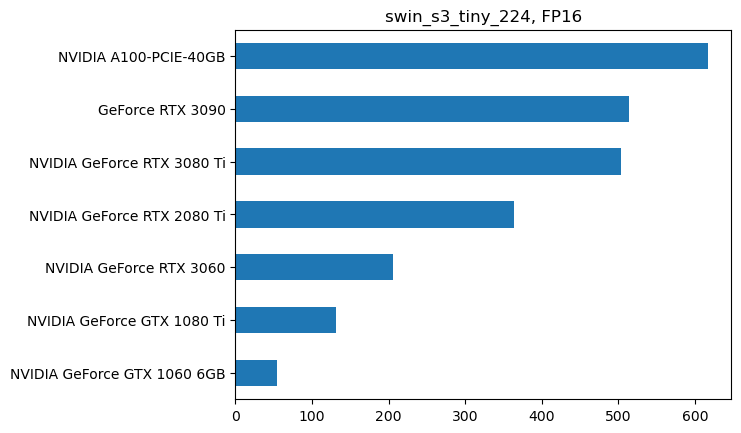

7
device_name
NVIDIA GeForce GTX 1060 6GB     53.886110
NVIDIA GeForce RTX 3060        119.061773
NVIDIA GeForce GTX 1080 Ti     126.832900
NVIDIA GeForce RTX 2080 Ti     217.387845
NVIDIA A100-PCIE-40GB          285.753879
NVIDIA GeForce RTX 3080 Ti     300.003782
GeForce RTX 3090               300.176114
Name: throughput, dtype: float64


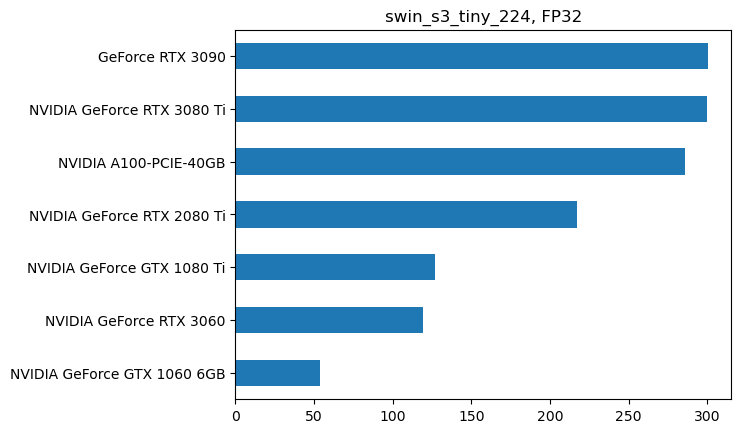

7
device_name
NVIDIA GeForce GTX 1060 6GB     91.577139
NVIDIA GeForce GTX 1080 Ti     219.712027
NVIDIA GeForce RTX 3060        290.370868
NVIDIA GeForce RTX 2080 Ti     521.958950
NVIDIA GeForce RTX 3080 Ti     709.301840
GeForce RTX 3090               806.580136
NVIDIA A100-PCIE-40GB          950.636744
Name: throughput, dtype: float64


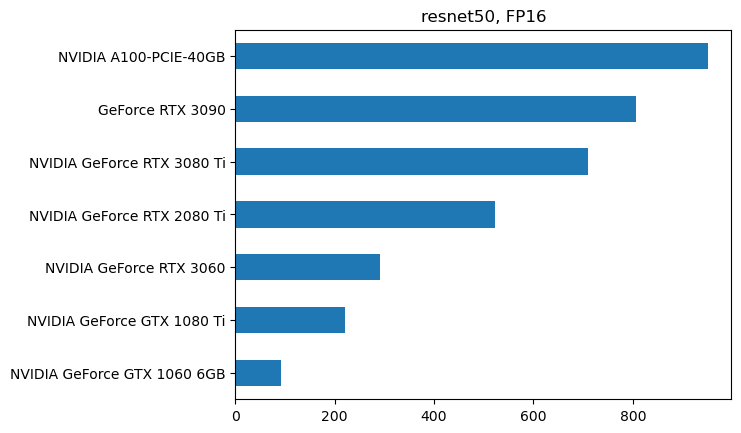

7
device_name
NVIDIA GeForce GTX 1060 6GB     76.822656
NVIDIA GeForce RTX 3060        187.592534
NVIDIA GeForce GTX 1080 Ti     188.205133
NVIDIA GeForce RTX 2080 Ti     279.292966
NVIDIA GeForce RTX 3080 Ti     463.213333
GeForce RTX 3090               514.710256
NVIDIA A100-PCIE-40GB          710.835062
Name: throughput, dtype: float64


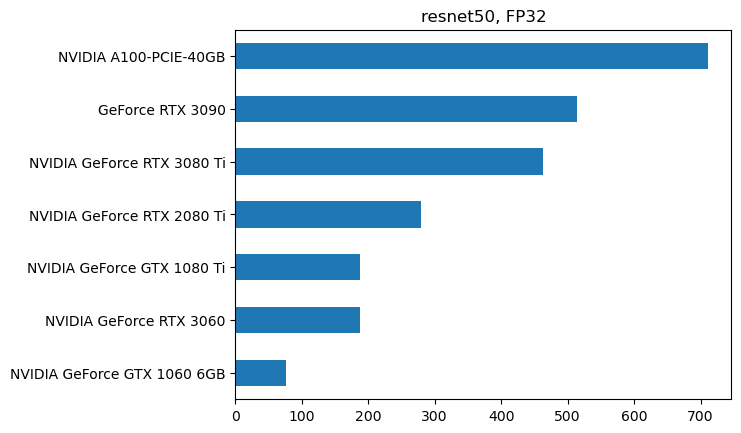

In [ ]:

for model in df.model.unique():
    for fp in df.fp16.unique():

        

        data = df.loc[ df.model.eq(model) & df.fp16.eq(fp) ]
        sorted_best_bs = data.groupby("device_name")["throughput"].max().sort_values()
    
        # _, ax = plt.subplot(figsize=(12, 7))

        print(len(sorted_best_bs))
        print(sorted_best_bs)        

        ax = sorted_best_bs.plot.barh(title=f"{model}, {fp}")
        ax.set_ylabel(None)
        plt.show(ax)

        # ax.yla

# df.loc[].groupby(["device_name"])["throughput"].max().sort_values().plot.barh()

In [ ]:
ax

<AxesSubplot: ylabel='device_name'>

In [ ]:

data = df.loc[ df.model.eq("resnet50") & df.fp16.eq("FP32") ].groupby("device_name")["throughput"].max().sort_values() #.plot.barh(ax)

In [ ]:
ax.barh(data, width=1)

<BarContainer object of 7 artists>

In [ ]:
plt.figure()

In [ ]:
run = api.run("/xl0/gpu-sprint/runs/3dhy7u3r")


In [ ]:
run

<Run xl0/gpu-sprint/3dhy7u3r (finished)>

{'platform': 'Linux-5.11.0-49-generic-x86_64-with-glibc2.27',
 'device_name': 'GeForce RTX 3090',
 'bs': 256,
 'cuda': '11.6',
 'fp16': True,
 'n_seconds': 30,
 'run_number': 1,
 'pytorch': '1.12.1',
 '_timestamp': 1665552841.647719,
 '_step': 0,
 'model': 'swin_s3_tiny_224',
 '_runtime': 5.663633584976196,
 'n_batches': None,
 'device_capability': '(8, 6)'}